In [8]:
import subprocess


def run(n: int):
    result = subprocess.run(
        ["mpirun", "-n", str(n), "python", "single.py"], stdout=subprocess.PIPE
    ).stdout.decode("utf-8")

    return result

In [ ]:
print(run(4))

In [35]:
import re


def data_load_ts_extractor(text: str):
    pattern = r"Data Loader takes ([0-9.]+) seconds for processor (\d+)"

    # Search for the pattern in the text
    match = re.search(pattern, text)

    # Extract process ID and time elapsed
    if match:
        time_elapsed = match.group(2)
        process_id = match.group(1)
        return (process_id, time_elapsed)

    return (None, None)


def communication_time_ts_extractor(text: str):
    pattern = r"Communication time takes ([0-9.]+) seconds for processor (\d+)"

    # Search for the pattern in the text
    match = re.search(pattern, text)

    # Extract process ID and time elapsed
    if match:
        time_elapsed = match.group(1)
        process_id = match.group(2)
        return (process_id, time_elapsed)

    return (None, None)


def whole_time_ts_extractor(text: str):
    pattern = r"Whole Processing takes ([0-9.]+) seconds for processor (\d+)"

    # Search for the pattern in the text
    match = re.search(pattern, text)

    # Extract process ID and time elapsed
    if match:
        time_elapsed = match.group(1)
        process_id = match.group(2)
        return (process_id, time_elapsed)

    return (None, None)

In [43]:
metrics = {}


def get_mtrics(n: int):
    loading_times = []
    communication_times = []
    whole_times = []

    for x in run(n).split("\n"):
        (loading_time, process_id) = data_load_ts_extractor(x)
        if process_id and loading_time:
            loading_times.append((int(process_id), float(loading_time)))

        (process_id, communication_time) = communication_time_ts_extractor(x)
        if process_id and communication_time:
            communication_times.append((int(process_id), float(communication_time)))

        (process_id, whole_time) = whole_time_ts_extractor(x)
        if process_id and whole_time:
            whole_times.append((int(process_id), float(whole_time)))

    # calculate mean times
    loading_times_mean = sum([x[1] for x in loading_times]) / len(loading_times)
    communication_times_mean = sum([x[1] for x in communication_times]) / len(
        communication_times
    )
    whole_times_mean = sum([x[1] for x in whole_times]) / len(whole_times)

    metrics[n] = (loading_times_mean, communication_times_mean, whole_times_mean)

In [48]:
for i in range(1, 7):
    get_mtrics(i)

/home/chxru/p/kmeans-mpi/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/chxru/p/kmeans-mpi/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/chxru/p/kmeans-mpi/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


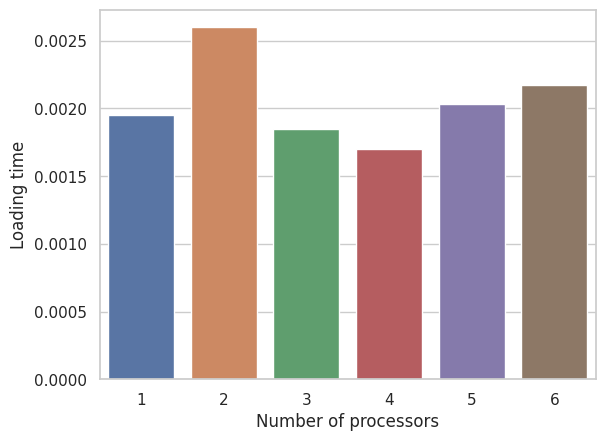

/home/chxru/p/kmeans-mpi/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/chxru/p/kmeans-mpi/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/chxru/p/kmeans-mpi/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


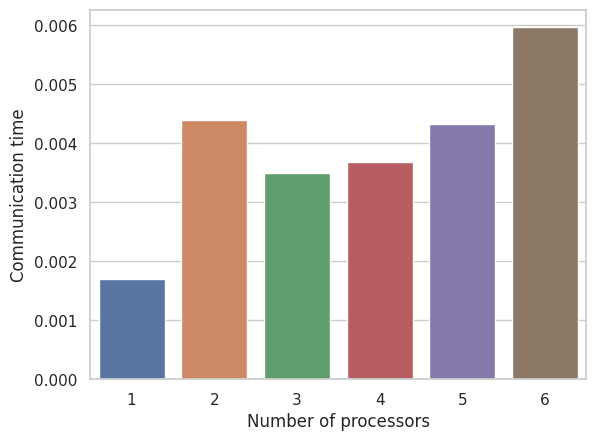

/home/chxru/p/kmeans-mpi/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/chxru/p/kmeans-mpi/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/chxru/p/kmeans-mpi/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


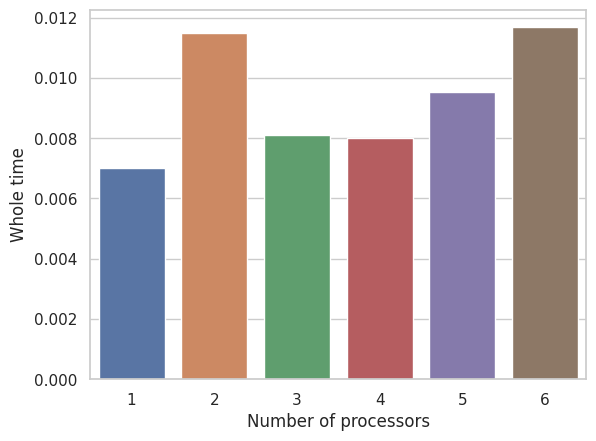

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_theme(style="whitegrid")

# show loading mean time
df = pd.DataFrame(
    {
        "Number of processors": [x for x in metrics.keys()],
        "Loading time": [x[0] for x in metrics.values()],
    }
)

sns.barplot(x="Number of processors", y="Loading time", data=df)
plt.show()

# show communication mean time
df = pd.DataFrame(
    {
        "Number of processors": [x for x in metrics.keys()],
        "Communication time": [x[1] for x in metrics.values()],
    }
)

sns.barplot(x="Number of processors", y="Communication time", data=df)
plt.show()

# show whole mean time
df = pd.DataFrame(
    {
        "Number of processors": [x for x in metrics.keys()],
        "Whole time": [x[2] for x in metrics.values()],
    }
)

sns.barplot(x="Number of processors", y="Whole time", data=df)
plt.show()